# Intro neurale netwerken

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Natuurlijke neuronen

![](figures/LabeledNeuron.png)

![](figures/neural_connection.png)

## Kunstmatige neuronen

![](figures/perceptron-with-neuron_1.png)

![](figures/ann_left.png)

$ s = x_1 w_1 + x_2 w_2 + \dots + b $

#### Vraagje

Hoe schrijven we dit compacter? Tip: gebruik lineaire algebra?

Oplossing

$ s = \vec{x} \cdot \vec{w} + b $

![](figures/ann.png)

$ O = f (\vec{x} \cdot \vec{w} + B) $

### De ReLU-functie

Nadat een neuron zijn inputs lineair combineert en sommeert met een *bias*, wordt er meestal nog een niet-lineaire functie toegepast.  Dit maakt de neuron "expressiever".  Deze functie heet de activatiefunctie van het neuron.  Er bestaan vele varianten van, maar wij zien enkel de belangrijkste.

De output van de ReLU-functie (*Rectified Linear Unit*) is 0 als $s_i$ negatief is, en $s_i$ als $s_i$ positief is.  Het is dus een stuksgewijs gedefinieerde functie:

$$
ReLU(s_i)
\begin{cases} 
      0,   \,\text{als}\, s_i \leq 0 \\
      s_i, \,\text{als}\, s_i > 0
   \end{cases}
$$


#### Opdracht

- Maak een 1D array `x` aan met waarden tussen -10 en 10.  Tip: gebruik `np.linspace(<min>, <max>, <aantal)`.
- Bereken de array `y` die de softmax-functie van alle elementen van `x` bevat.  Tip: gebruik een `for` en `if`.
- Plot `y` in functie van `x`.


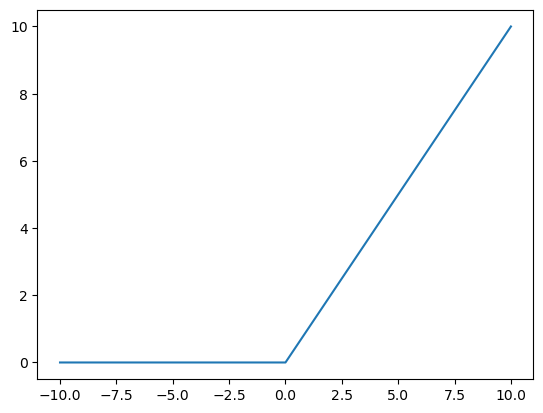

## Neurale netwerken

*Dense net*: alle neuronen van alle lagen verbonden met alle neuronen van vorige en volgende laag

![](figures/mnist_net.jpg)

n## Nog een (klein) beetje wiskunde.

### Output van het j-de neuron in de i-de laag

$x_{j} = x_{0} w_{j,0} + x_{1} w_{j,1} + \dots + b_{j} = \vec{x} \cdot \vec{w}_j + b_{j} $

met 

$\vec{x} = \begin{bmatrix}
x_0\\
x_1\\
\dots
\end{bmatrix}$ de inputvector naar laag $i$,

$\vec{w}_j = \begin{bmatrix}
w_{j,0}\\
w_{j,1}\\
\dots
\end{bmatrix}$ de vector met de gewichten van het $j$-de neuron van laag $i$ en 

$b_j$ de bias van van dat neuron. 


### Matrix-vector product

![](figures/MatrixDefFigure7.jpg)

### Opdracht

Wat is de output van alle neuronen in de $i$-de laag?  

Tip: Zet de gewichten van de neuronen samen in een matrix:

$ W_i = \begin{bmatrix}
w_{0,0} & w_{0,1} & w_{0,2} & \dots\\
w_{1,0} & w_{1,1} & w_{1,2} & \dots\\
\dots   & \dots   & \dots   & \dots
\end{bmatrix}$

en de biases in een vector

$\vec{b_i} = \begin{bmatrix}
b_0\\
b_1\\
b_2\\
\dots
\end{bmatrix}$

### Laag na laag

<u>Start 

$\vec{x}_0$

(wat is dit?)


<u>Laag 0:

$\vec{x}_1 = f_0(W_0 \vec{x}_0 + \vec{b}_0)$

<u>Laag 1:

$
\begin{aligned}
\vec{x}_2 &= f_1(W_1 \vec{x}_1 + \vec{b}_1) \\
          &= f_1\left(W_1 (f_0(W_0 \vec{x}_0 + \vec{b}_0)\right) + \vec{b}_2)
\end{aligned}
$


<u>Laag 2:

$
\begin{aligned}
\vec{x}_3 &= f_2(W_2 \vec{x}_2 + \vec{b}_2) \\
          &= f_2 \left(W_2 \left(f_1 \left(W_1 \vec{x}_1 + \vec{b}_1 \right) \right) + \vec{b}_2\right) \\
          &= f_2\left(W_2 \left(f_1 \left(W_1 \left(f_0 \left(W_0 \vec{x}_0 + \vec{b}_0 \right) \right) + \vec{b}_1 \right) \right) + \vec{b}_2 \right)          
\end{aligned}
$

...

Oplossing

$\vec{x}_{i+1} = f(W_i \vec{x}_i + \vec{b}_i)$.



#### Vraagjes

- Hebben de vectoren $\vec{x_0}$, $\vec{x_1}$, enz. dezelfde grootte?  Waarom (niet)?

- Hoe groot zou je de outputvector maken als je cijfers wilt classificeren?


### De softmax-functie 

Stel dat we een laag van tien neuronen hebben, en dat we voor een iris de $s$-waarden van alle neuronen hebben berekend.  Dit kunnen we schrijven als een vector $\vec{s} = \begin{bmatrix}s_0\\s_1\\\dots\\s_{9}\end{bmatrix}$.  
Deze waarden kunnen in principe overal tussen $-\infty$0 en $+\infty$ zitten.  De softmax-functie brengt alle outputs van de neuronen van deze laag tussen de waarden 0 en 1.

Eerst berekenen we de exponentiele functie van alle gewogen sommen: $e^{s_i}$.  Deze sommeren we: $\sum_{i} e^{s_i}$.  Tenslotte delen we elke $e^{s_i}$ door die som: 

$$\sigma(s_i) = \frac{e_{s_i}}{\sum_{i} e^{s_i}}$$

Aangezien de outputs van de softmax-functie tussen 0 en 1 liggen, en sommeren tot 1, kunnen ze geinterpreteerd worden als waarschijnlijkheden van klassen.  Dit zal van pas komen bij de klassificatietaak (zie verder).

#### Opdracht

Stel dat we een laag met vier neuronen hebben, en dat die als lineaire outputs -5, 10, 8 en 3 hebben. 

- Bereken de output van de softmax-functie voor elke van deze neuronen.
- Plot dit in een staafdiagram.  Tip: gebruik `plt.bar(x = ..., height = ...)`.


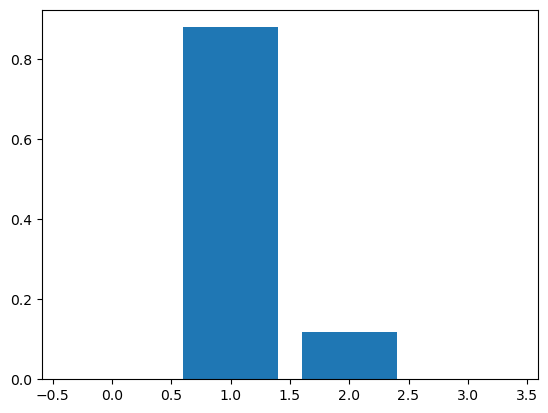

#### Opdracht

Waarom kunnen we niet gewoon de softmax-functie plotten voor een array met waarden van -10 tot 10, zoals we deden bij de ReLU-functie?

## Toepassen op de iris dataset

#### Opdracht

- Laad de iris dataset opnieuw
- Split in train en test set.
- Split de train en test set elk in een feature matrix en een target vector: `X_train`, `X_test`, `y_train`, `y_test`.  Al deze objecten moeten numpy arrays zijn.  
- Zet de strings  (`Iris-versicolor`, `Iris-virginica`, `Iris-setosa`) in de targets om naar respectievelijk de getallen 0, 1 en 2.  Zorg dat elke array een numerieke elementen heeft, geen strings.


### Neuraal netwerk

De package `torch` laat ons toe om heel eenvoudig met neurale netwerken te werken.  In onderstaande code maken we eerst een netwerk met drie lagen aan.  Daarna trainen we het netwerk op de train set.

In [16]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [17]:
import tqdm

EPOCHS  = 100
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.63it/s]


Het model is nu klaar om voorspellingen te maken.  Voor elke input geeft het als output drie waarschijnlijkheden (een voor elke klasse).

#### Opdracht

- Voorspel de test set met het getrained model.  Tip: gebruik `model(X_test)`.
- Evalueer het model
    - Maak een lijst met voor elke voorspelling de index (0, 1 of 2) van de klasse met de hoogste waarschijnlijkheid.
    - Tel het aantal keren dat de voorspelde index gelijk is aan de ware index (in `y_test`).
    - Bereken de accuraatheid van het model voor de test set.


38
100.0 %


#### Bronnen

https://janakiev.com/blog/pytorch-iris/